# Reading data from adc_minimal_block_convert

In [1]:
# Import some useful libraries
import serial, time
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]

## First, open the serial connection

In [2]:
ser = serial.Serial('/dev/ttyACM0', 115200) # Usually ACM0, changes with restarts

## Now we send commands and read the data.

To send a command
    - clear the buffer
    - write command with ser.write('c')
    - wait for a response.

To read back the response for a short response, like the time taken massage returned by 'c'
    - Use ser.read_all()
    
To read back the response when the micro needs to send lots of data
    - Use ser.readline() or ser.read() in a loop. If you read fast enough, you can empty the buffer prematurely so
    - check if the bufer is empty, and if it is, wait and check again before exiting the loop. If not
    - Keep reading until the buffer stays empty
    
I store the values in a list (a) and plot them later.

In [3]:
%%time
r = ser.read_all() # clear serial buffer

# Start a conversion
ser.write(b'c')
while ser.in_waiting < 1:
    pass # wait for a response
time.sleep(0.05) # This extra delay helps with reliability - it gives the micro time to send all it needs to
r = ser.read_all()
print(r) # Prints the time

# Get the values
ser.write(b'p') # Print DMA buffer
while ser.in_waiting < 1:
    pass # wait for a response

a = []
i = 0
while True:
    if ser.in_waiting < 1:
        time.sleep(0.005) # Wait and check again
        if ser.in_waiting < 1:
            break
    b = ser.readline()
    a.append(b)
    i += 1
    
print(len(a), i) # Should be 10000 readings

b'Conversion complete in 20000 us\n'
10000 10000
CPU times: user 308 ms, sys: 109 ms, total: 417 ms
Wall time: 480 ms


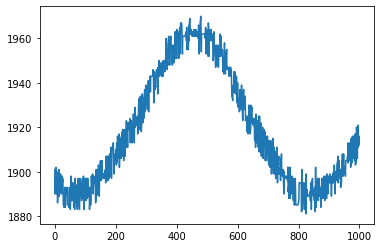

In [5]:
plt.plot([int(n) for n in a[100:1100]]) # microphone heard me whistling

In [6]:
ser.close() # Close the connection when you're done.